In [4]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# read in data
traffic_data = pd.read_csv("master.csv")

In [8]:
traffic_data.dtypes

traffic_data['prev_sect_id'] = traffic_data['prev_sect_id'].astype('int64')
traffic_data['next_sect_id'] = traffic_data['next_sect_id'].astype('int64')

In [9]:
traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5


In [13]:
# making rush hour in incr and decr directions
# NOTE: proportional to the number of lanes on each side
traffic_data.rename(columns={'Number of Lanes DECR MP direction ':'Number of Lanes DECR MP direction'}, inplace=True)

traffic_data['rush_hour_decr_mp'] = traffic_data['rush_hour_rate'] * traffic_data['Number of Lanes DECR MP direction'] / (traffic_data['Number of Lanes DECR MP direction'] + traffic_data['Number of Lanes INCR MP direction'])
traffic_data['rush_hour_incr_mp'] = traffic_data['rush_hour_rate'] * traffic_data['Number of Lanes INCR MP direction'] / (traffic_data['Number of Lanes DECR MP direction'] + traffic_data['Number of Lanes INCR MP direction'])

traffic_data['rush_hour_decr_mp'] = traffic_data['rush_hour_decr_mp'].astype('int64')
traffic_data['rush_hour_incr_mp'] = traffic_data['rush_hour_incr_mp'].astype('int64')

traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id,rush_hour_decr_mp,rush_hour_incr_mp
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1,2600,2600
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2,3400,3400
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3,4320,4320
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4,4040,4040
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5,4937,6582


In [15]:

for i in range(len(traffic_data)):
    next_section = traffic_data.loc[i, 'next_sect_id']
    prev_section = traffic_data.loc[i, 'prev_sect_id']
    if prev_section == -1:
        traffic_data.loc[i, 'delta_incr'] = traffic_data.loc[i, 'rush_hour_incr_mp']
    else:
        traffic_data.loc[i, 'delta_incr'] = traffic_data.loc[i, 'rush_hour_incr_mp'] - traffic_data.loc[prev_section, 'rush_hour_incr_mp']
    if next_section == -1:
        traffic_data.loc[i, 'delta_decr'] = traffic_data.loc[i, 'rush_hour_decr_mp']
    else:
        traffic_data.loc[i, 'delta_decr'] = traffic_data.loc[i, 'rush_hour_decr_mp'] - traffic_data.loc[next_section, 'rush_hour_decr_mp']
        
traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id,rush_hour_decr_mp,rush_hour_incr_mp,delta_incr,delta_decr
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1,2600,2600,2600.0,-800.0
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2,3400,3400,800.0,-920.0
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3,4320,4320,920.0,280.0
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4,4040,4040,-280.0,-897.0
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5,4937,6582,2542.0,720.0


In [16]:
traffic_data['free_flow_decr'] = 1600 * traffic_data['Number of Lanes DECR MP direction']
traffic_data['free_flow_incr'] = 1600 * traffic_data['Number of Lanes INCR MP direction']
traffic_data.head()

,Unnamed: 0,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Unnamed: 7,Comments,rush_hour_rate,prev_sect_id,next_sect_id,rush_hour_decr_mp,rush_hour_incr_mp,delta_incr,delta_decr,free_flow_decr,free_flow_incr
0,0,5,100.93,101.87,65000,IS,3,3,NaN,Olympia,5200.0,-1,1,2600,2600,2600.0,-800.0,4800,4800
1,1,5,101.87,103.17,85000,IS,3,3,NaN,NaN,6800.0,0,2,3400,3400,800.0,-920.0,4800,4800
2,2,5,103.17,103.42,108000,IS,3,3,NaN,NaN,8640.0,1,3,4320,4320,920.0,280.0,4800,4800
3,3,5,103.42,104.81,101000,IS,3,3,NaN,NaN,8080.0,2,4,4040,4040,-280.0,-897.0,4800,4800
4,4,5,104.81,105.63,144000,IS,3,4,NaN,Rte 101 intersection,11520.0,3,5,4937,6582,2542.0,720.0,4800,6400


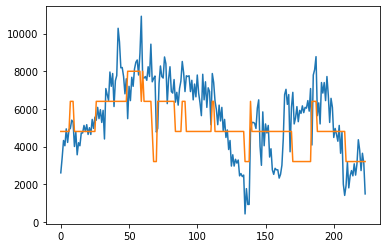

In [25]:
plt.plot(traffic_data['Unnamed: 0'], traffic_data['rush_hour_decr_mp'])
plt.plot(traffic_data['Unnamed: 0'], traffic_data['free_flow_decr'])

In [23]:
count = 0
for i in range(len(traffic_data)):
    if traffic_data.loc[i, 'rush_hour_decr_mp'] > traffic_data.loc[i, 'free_flow_decr']:
            count = count + 1

count/len(traffic_data)    

0.6026785714285714

In [22]:
count = 0
for i in range(len(traffic_data)):
    if traffic_data.loc[i, 'rush_hour_incr_mp'] > traffic_data.loc[i, 'free_flow_incr']:
            count = count + 1

count/len(traffic_data)    

0.6026785714285714